# Random Forest Model

Import relevant libraries and load the functions in [functions_book.py](functions_book.py)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import pandas as pd
%run -i 'functions_book.py'

Read in data generated by [RF data preparation](RF_data_preparation.ipynb)

In [23]:
data = pd.read_csv('output.csv', index_col = False)
print("Sample dimentions:".format(), data.shape)
print(data.head())
X = data[['Blue','Green','Red']]
y = data['Truth']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.96,random_state=1)

Sample dimentions: (376863, 4)
   Blue  Green   Red  Truth
0  1587   2195  2520      0
1  1608   2228  2565      0
2  1593   2230  2601      0
3  1384   2018  2389      0
4  1361   1984  2351      1


Make a model (currently arbitrary hyperparameters)

In [24]:
model = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=3)

In [25]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1000)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Mean Score: %.6f (SD: %.6f)' % (n_scores.mean(),n_scores.std()))

Mean Score: 0.889427 (SD: 0.007424)


In [ ]:
# Make predictions on the test data
y_pred_train = model.predict(X_train)

# Compute the confusion matrix
cm_train = classification_report(y_train, y_pred_train)

print(cm)

Plot

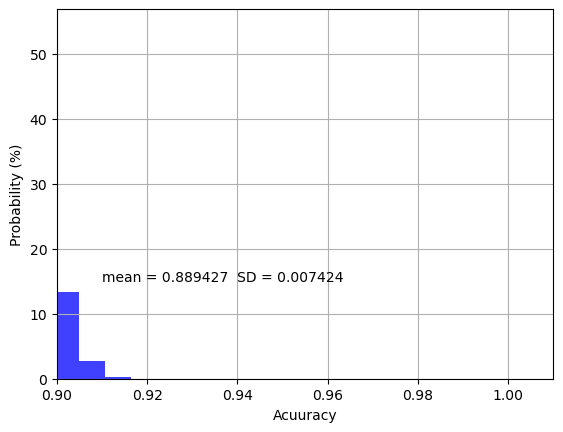

In [26]:
# the histogram of the scores
n, bins, patches = plt.hist(n_scores, density=True, facecolor='blue', alpha=0.75)
plt.text(0.91, 15, r'mean = ' + str(n_scores.mean().round(6)) + '  '+ 'SD = ' + str(n_scores.std().round(6)))
plt.xlim(0.9, 1.01)
plt.xlabel('Acuuracy')
plt.ylabel('Probability (%)')
plt.grid(True)
plt.show()

Permutation importance - average: Index(['Blue', 'Green', 'Red'], dtype='object')
[0.416277, 0.083592, 0.248617]


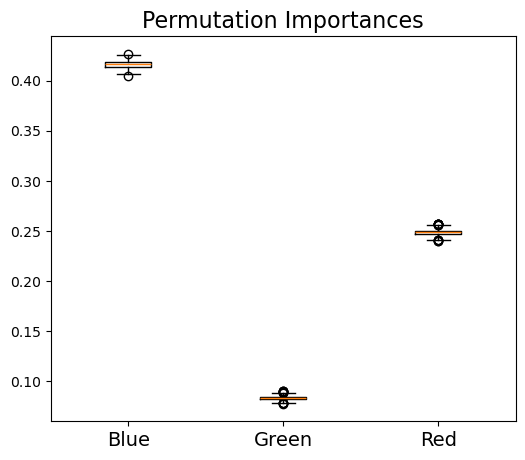

In [27]:
model.fit(X_train,y_train)
result = permutation_importance(model, X_train, y_train, n_repeats=1000, random_state=42, n_jobs=2)
print('Permutation importance - average:'.format(), X_train.columns)
print([round(i, 6) for i in result.importances_mean])

# displace feature importance
fig, ax = plt.subplots(figsize=(6,5))
ax.boxplot(result.importances.T)
ax.set_title("Permutation Importances", fontsize = 16)
ax.set_xticklabels(labels=X_train.columns, fontsize=14)
plt.show()

Save model

In [28]:
dir_model = "./random_forest_SCA_binary.joblib"
joblib.dump(model, dir_model)

['./random_forest_SCA_binary.joblib']